# 1.Data Load

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 라이브러리

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [ ]:
class CFG:
    SEED = 37
    
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [ ]:
# 구글드라이브 활용

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
!unzip -qq '/content/drive/MyDrive/project_study_KKUL/008_LGaimers/LG_DATA.zip'

In [ ]:
test = pd.read_csv('/content/sample_data/test.csv')
train = pd.read_csv('/content/sample_data/train.csv')

# 2.EDA

## 1) 전체 train data 중 적합, 부적합 (기준 미달, 초과) 알아보기

<AxesSubplot:xlabel='Y_Class', ylabel='count'>

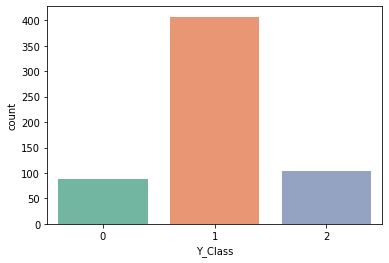

In [ ]:
sns.countplot(x = 'Y_Class', data = train, palette = 'Set2')

## 2) LINE

### (1) LINE 갯수 확인

In [ ]:
# LINE 기준으로 정렬하여 순서 맞추기
test = test.sort_values(by = 'LINE')
train = train.sort_values(by = 'LINE')

Text(0.5, 1.0, 'Test')

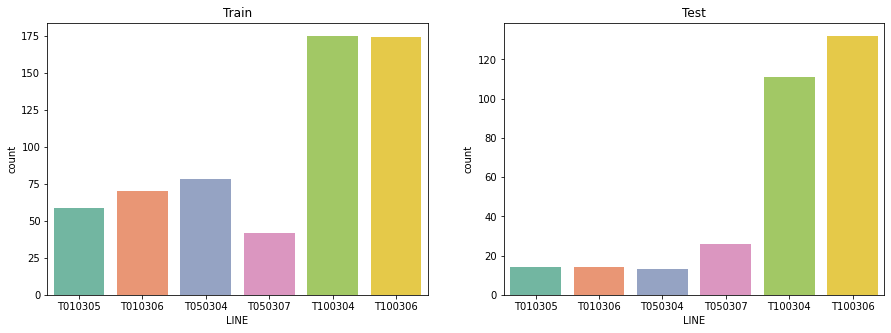

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

### Train
sns.countplot(x = 'LINE', data = train, palette = 'Set2', ax = ax1)

### test
sns.countplot(x = 'LINE', data = test, palette = 'Set2', ax = ax2)

ax1.set_title('Train')
ax2.set_title('Test')

### (2) LINE에 따른 Y_Class 확인

<AxesSubplot:xlabel='LINE', ylabel='count'>

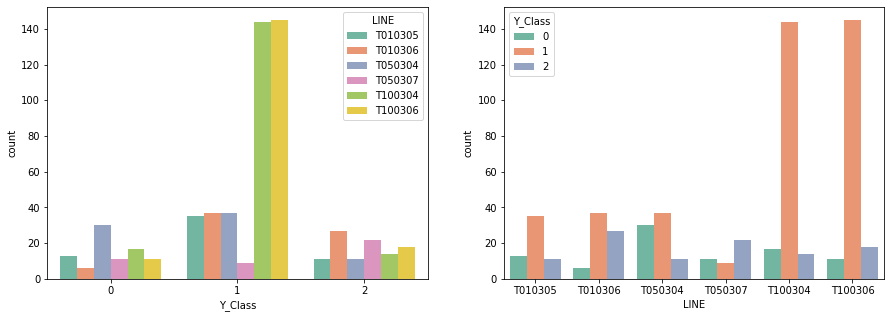

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(x = 'Y_Class', hue = 'LINE', data = train, palette = 'Set2', ax = ax1)

sns.countplot(x = 'LINE', hue = 'Y_Class', data = train, palette = 'Set2', ax = ax2)

## 3) PRODUCT_CODE

### (1) PRODUCT_CODE 갯수 확인

In [ ]:
# PRODUCT_CODE 기준으로 정렬하여 순서 맞추기
test = test.sort_values(by = 'PRODUCT_CODE')
train = train.sort_values(by = 'PRODUCT_CODE')

Text(0.5, 1.0, 'Test')

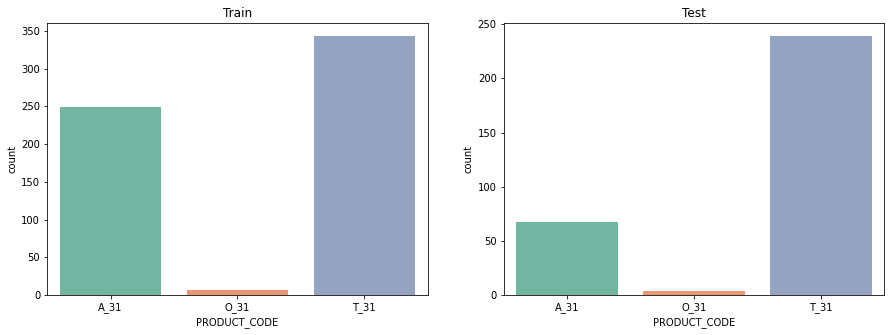

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

### Train
sns.countplot(x = 'PRODUCT_CODE', data = train, palette = 'Set2', ax = ax1)

### test
sns.countplot(x = 'PRODUCT_CODE', data = test, palette = 'Set2', ax = ax2)

ax1.set_title('Train')
ax2.set_title('Test')

### (2) PRODUCT_CODE에 따른 Y_Class 확인

<AxesSubplot:xlabel='PRODUCT_CODE', ylabel='count'>

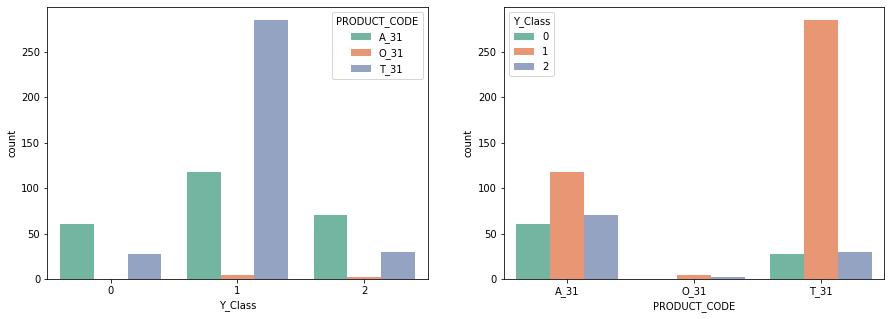

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(x = 'Y_Class', hue = 'PRODUCT_CODE', data = train, palette = 'Set2', ax = ax1)

sns.countplot(x = 'PRODUCT_CODE', hue = 'Y_Class', data = train, palette = 'Set2', ax = ax2)

## 4) Y_Quality, Y_Class

<AxesSubplot:xlabel='Y_Class', ylabel='Y_Quality'>

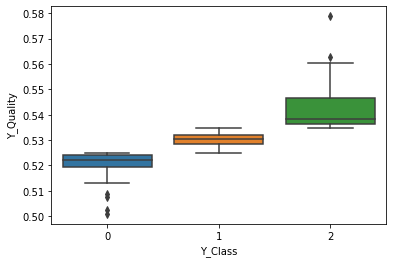

In [ ]:
sns.boxplot(x = 'Y_Class', y = 'Y_Quality', data = train)

* 어떤 특정 구간을 기준으로 품질이 구분되는 것을 확인할 수 있음. 이를 바탕으로 PRODUCT_CODE 별로 Y_Quality의 최소값, 최대값 확인 (O_31 제품은 Y_Class가 0인 제품이 존재하지 않아 NaN 값)

In [ ]:
train_pivot = pd.pivot_table(train, index = 'Y_Class', columns = 'PRODUCT_CODE', values = 'Y_Quality', aggfunc = ['min', 'max'])
train_pivot

min                           max                    
PRODUCT_CODE      A_31      O_31      T_31      A_31      O_31      T_31
Y_Class                                                                 
0             0.500856       NaN  0.502517  0.525046       NaN  0.525067
1             0.525086  0.525916  0.525213  0.534843  0.533702  0.534837
2             0.535279  0.534951  0.534951  0.578841  0.535205  0.551279